In [35]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
gait = pd.read_csv("gaitFull.csv")
#gait = pd.read_csv("gaitFullModified2.csv")

In [37]:
X1 = gait.drop('label',  axis=1)
y = gait['label']

In [38]:
#'P1','P2','P3','x1','y1','z1','x2','y2','z2'
X = pd.DataFrame(X1 , columns= ['P1','P2','P3','r'])
Xa1 = pd.DataFrame(X1 , columns= ['x1','y1','z1'])
Xb1 = pd.DataFrame(X1 , columns= ['x2','y2','z2'])

In [39]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
Xa1 = sc.fit_transform(Xa1) 
Xb1 = sc.transform(Xb1) 

from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 1) 
  
Xa1 = pca.fit_transform(Xa1)   
explained_variance = pca.explained_variance_ratio_ 

from sklearn.decomposition import PCA 
  
pca1 = PCA(n_components = 1) 
  
Xb1 = pca1.fit_transform(Xb1)   
explained_variance = pca.explained_variance_ratio_ 

In [40]:
X.insert(3, "Xa1", Xa1, True) 
X.insert(4, "Xb1", Xb1, True) 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state=42)

In [42]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [43]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters=8, random_state=0)

In [49]:
kmeans.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [50]:
Y_pred=kmeans.predict(X_test)

In [51]:
print(confusion_matrix(y_test, Y_pred))

[[ 0 29  1 11  7  1  1  3]
 [ 0  8  0 38  3  0  0  1]
 [ 0  6  0 55  1  0  3  1]
 [ 8 11  8 14  1  8  4  5]
 [40  5  2  6  2  9  1  5]
 [ 5  7  5  9  1  7  7 10]
 [ 0 17  3  7 29  3 11  1]
 [ 0 23  0  2 22  6  2  1]]


In [52]:
d=confusion_matrix(y_test, Y_pred)

In [53]:
print(classification_report(y_test, Y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.08      0.16      0.10        50
           2       0.00      0.00      0.00        66
           3       0.10      0.24      0.14        59
           4       0.03      0.03      0.03        70
           5       0.21      0.14      0.16        51
           6       0.38      0.15      0.22        71
           7       0.04      0.02      0.02        56

    accuracy                           0.09       476
   macro avg       0.10      0.09      0.09       476
weighted avg       0.11      0.09      0.09       476



In [137]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.523 (0.037)


In [93]:
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison


>10 0.503 (0.037)
>50 0.527 (0.034)
>100 0.522 (0.038)
>500 0.515 (0.031)
>1000 0.506 (0.030)
>5000 0.501 (0.031)


NameError: name 'pyplot' is not defined

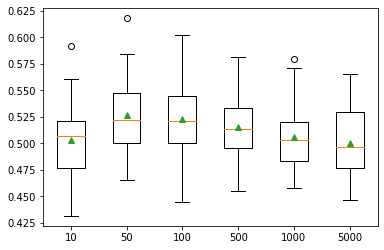

In [100]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>0.1 0.399 (0.039)
>0.2 0.484 (0.034)
>0.3 0.506 (0.038)
>0.4 0.516 (0.033)
>0.5 0.521 (0.035)
>0.6 0.521 (0.030)
>0.7 0.526 (0.037)
>0.8 0.523 (0.032)
>0.9 0.528 (0.035)


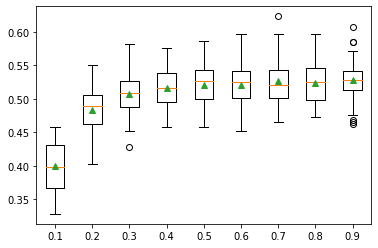

In [120]:
def get_models():
	models = dict()
	# explore sample ratio from 10% to 100% in 10% increments
	for i in [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [121]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset

# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.528246 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.7}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.5}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.7}
0.155263 (0.001726) with: {'learning_rate': 0.0001, 'm

In [ ]:
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.7}

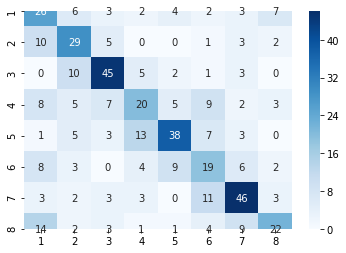

In [129]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "12345678"],
              columns = [i for i in "12345678"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [ ]:
gait = pd.read_csv("gaitFullModified2.csv")

In [ ]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "1234"],
              columns = [i for i in "1234"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [ ]:
model = Sequential()
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

model.add(Conv1D(100, kernel_size=5, input_shape=(n_timesteps, n_features)))
model.add(LSTM(100,
         return_sequences=False,activation='relu'))

model.add(Dropout(0.5))
#model.add(Flatten())


#model.add(LSTM(units=50,
 #        return_sequences=False))
#model.add(Dropout(0.2))

#model.add(Dense(200, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(units=n_outputs, activation='sigmoid'))
model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
  # Instantiate a SimpleMinCostFlow solver.
  min_cost_flow = pywrapgraph.SimpleMinCostFlow()

  # Add each arc.
  for i in range(0, len(start_nodes)):
    min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i],
                                                capacities[i], unit_costs[i])

  # Add node supplies.

  for i in range(0, len(supplies)):
    min_cost_flow.SetNodeSupply(i, supplies[i])